### Demo notebook for model trained on Pneumothorax Segmentation dataset

This notebook requires: 
```
pip install -U efficientnet==0.0.4
pip install tensorflow==1.14.0
pip install keras==2.2.4
```

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import numpy as np
import cv2
import matplotlib.pyplot as plt

from PIL import Image
from keras.utils.data_utils import get_file
from keras import backend as K

# Go back one step to read module
import sys
sys.path.insert(0,"..")
from models import UEfficientNet


IMAGE_SIZE = 256

def preprocess_image(uploaded_file):
    # Load image
    img_array = np.array(Image.open(uploaded_file))
    # Check that images are 2D arrays
    if len(img_array.shape) > 2:
        img_array = img_array[:, :, 0]
    # Convert to 3-channel
    img_array = np.stack((img_array, img_array, img_array), axis=-1)
    img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
    return img_array


def get_model():
    K.clear_session()
    # Initialize model
    model = UEfficientNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), dropout_rate=0.5)
    URL = "https://github.com/hasibzunair/cxr-predictor/releases/latest/download/SIIM-ACR_UEfficientNetB4_SWA_res256.h5"
    weights_path = get_file(
              "SIIM-ACR_UEfficientNetB4_SWA_res256.h5",
              URL)
    # Load trained weights
    model.load_weights(weights_path)
    return model

def make_prediction(file):
    # Preprocess input image
    image = preprocess_image(file)
    # Add batch axis
    image = np.expand_dims(image, 0)
    # Predict
    predictions = model.predict(image)
    return predictions

Using TensorFlow backend.
/home/hasib/anaconda3/envs/thorax/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hasib/anaconda3/envs/thorax/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hasib/anaconda3/envs/thorax/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hasib/anaconda3/e

In [2]:
model = get_model()
model.summary()







Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 

In [3]:
uploaded_file = "/home/hasib/Desktop/test/images/1.2.276.0.7230010.3.1.4.8323329.305.1517875162.307235.png"
uploaded_file = "/home/hasib/Desktop/pneumothorax_rightside.jpeg"

In [4]:
img = np.array(Image.open(uploaded_file))

In [5]:
img.shape

(686, 800, 3)

In [6]:
img_rs = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
img_rs.shape

(256, 256, 3)

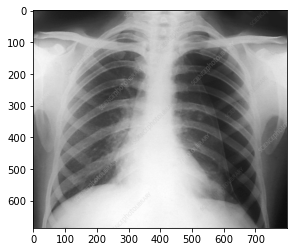

In [7]:
plt.imshow(img, cmap='gray')
plt.grid(False)

In [8]:
predictions = make_prediction(uploaded_file)
predictions.shape

(1, 256, 256, 1)

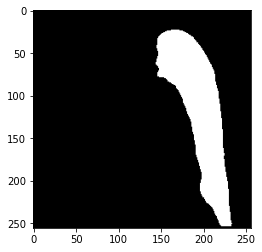

In [9]:
mask = np.squeeze(predictions)
mask = np.round(mask, 0)
plt.imshow(mask, cmap="gray")
plt.grid(False)

In [10]:
img.shape, mask.shape

((686, 800, 3), (256, 256))

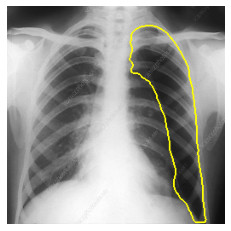

In [11]:
# Plot boundary on image
from skimage.segmentation import mark_boundaries, find_boundaries
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

edges_pz = mark_boundaries(img_rs, mask,color=(1,1,0), mode='thin') # unet
plt.grid(False)
plt.axis('off')
plt.imshow(edges_pz)